***TASK 3 - Geographical Visualizations with Python***

***Table of Content***

1. Importing Libraries & Options
2. Importing Dataframes
3. Checking the Data
4. Data Wrangling & Cleaning
5. Plotting a Choropleth

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

!pwd

import os
os.chdir('/content/drive/MyDrive/airbnb-data-analysis/code')

!pwd

Mounted at /content/drive/
/content
/content/drive/MyDrive/airbnb-data-analysis/code


***1. Importing Libraries & Options***

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import folium
import json

In [3]:
# Prompting matplotlib visuals to appear in the notebook 

%matplotlib inline
pd.options.display.max_columns = None

***2. Importing Dataframes***

In [4]:
# Importing ".json" file for the United Kingdom

country_geo = r'../neighbourhoods.geojson'

In [5]:
country_geo

'../neighbourhoods.geojson'

In [6]:
# Looking at the JSON file contents:

f = open(r'/content/drive/MyDrive/airbnb-data-analysis/neighbourhoods.geojson',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-122.484089, 37.78791], [-122.484346, 37.787654], [-122.487434, 37.787491], [-122.487123, 37.78376], [-122.492526, 37.783501], [-122.492407, 37.781663], [-122.505317, 37.780998], [-122.505144, 37.779774], [-122.5062, 37.779868], [-122.507818, 37.779952], [-122.509504, 37.779923], [-122.509342, 37.779145], [-122.509095, 37.77519], [-122.513169, 37.775046], [-122.51317, 37.775109], [-122.51315, 37.775202], [-122.513168, 37.775295], [-122.513139, 37.775383], [-122.513155, 37.775413], [-122.513118, 37.775495], [-122.513116, 37.775992], [-122.51322, 37.776643], [-122.513262, 37.776766], [-122.513273, 37.776853], [-122.513301, 37.776996], [-122.513337, 37.777197], [-122.513351, 37.77733], [-122.513419, 37.777443], [-122.513485, 37.777542], [-122.513512, 37.777603], [-122.513606, 37.777634], [-122.51379, 37.777711], [-122.51397, 37.777743], [-122.51413, 37.777902], [-122.514272, 37.778125], [-122.514414, 37.778271], [

In [7]:
# Importing dataframe

df = pd.read_csv('listings_clean.csv', dtype={'host_listings_count': 'str'}, index_col = False)

***3. Checking the Data***

In [9]:
# 46 columns, but I will only need 2 to create my map

df.shape

(5266, 46)

In [10]:
# I will isolate 'neighbourhood_cleansed' and 'price_usd' to create the map

df.head()

,id,host_id,host_since,host_response_time,host_resp_rate_pct,host_accept_rate_pct,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price_usd,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_category
0,144978,216682,2010-08-29,within a few hours,100,89,f,9,t,t,Pacific Heights,37.79233,-122.42431,Private room in rental unit,Private room,1,Unknown,1.0,1.0,55.0,30,365,t,7,24,54,54,120,0,0,2011-07-10,2020-03-31,4.68,4.78,4.45,4.86,4.81,4.81,4.66,f,9,4,5,0,0.86,excellent
1,958,1169,2008-07-31,within an hour,100,98,t,1,t,t,Western Addition,37.77028,-122.43317,Entire serviced apartment,Entire home/apt,3,1 bath,1.0,2.0,194.0,2,30,t,1,15,35,161,371,57,2,2009-07-23,2022-11-18,4.86,4.93,4.92,4.95,4.88,4.98,4.76,f,1,1,0,0,2.28,excellent
2,5858,8904,2009-03-02,within a few hours,80,71,f,2,t,t,Bernal Heights,37.74474,-122.42089,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,235.0,30,60,t,30,60,90,365,111,0,0,2009-05-03,2017-08-06,4.88,4.85,4.87,4.89,4.85,4.77,4.68,f,1,1,0,0,0.67,excellent
3,8142,21994,2009-06-17,within a few hours,100,74,f,12,t,t,Haight Ashbury,37.76555,-122.45213,Private room in rental unit,Private room,1,4 shared baths,1.0,1.0,56.0,32,90,t,30,60,90,365,9,1,0,2014-09-08,2022-10-27,4.67,4.44,4.44,4.78,4.78,4.67,4.67,f,12,0,12,0,0.09,excellent
4,8739,7149,2009-01-27,within an hour,100,89,t,2,t,t,Mission,37.76030,-122.42197,Private room in condo,Private room,3,1 private bath,1.0,1.0,129.0,1,26,t,15,41,71,161,761,25,1,2009-08-01,2022-11-18,4.91,4.94,4.94,4.95,4.96,4.93,4.74,f,2,0,2,0,4.68,excellent


In [11]:
# Checking the name of the neighbourhood, they msut match my json file names (they do!)

df['neighbourhood_cleansed'].value_counts().sort_index()

Bayview                  139
Bernal Heights           254
Castro/Upper Market      230
Chinatown                 90
Crocker Amazon            37
Diamond Heights            9
Downtown/Civic Center    624
Excelsior                144
Financial District        89
Glen Park                 46
Golden Gate Park           3
Haight Ashbury           230
Inner Richmond           148
Inner Sunset             115
Lakeshore                 45
Marina                   144
Mission                  483
Nob Hill                 228
Noe Valley               189
North Beach               92
Ocean View                81
Outer Mission            103
Outer Richmond           152
Outer Sunset             264
Pacific Heights          103
Parkside                 124
Potrero Hill             118
Presidio                   7
Presidio Heights          24
Russian Hill              99
Seacliff                   6
South of Market          324
Twin Peaks                39
Visitacion Valley         58
West of Twin P

In [12]:
# Checking the price_usd data
# There are some extreme values / outliers, I will address them

df['price_usd'].describe()

count    5266.000000
mean      173.467148
std       106.530072
min        10.000000
25%        98.000000
50%       143.000000
75%       220.000000
max       550.000000
Name: price_usd, dtype: float64

***4. Data Wrangling & Cleaning***

***First I am focusing on deciding where to put the threshold for maximum price per night / how many listings to exclude. According to my previous query 75% of the data is below $220/night, however this figure seems quite low for some of San Francisco central properties (particularly more luxurious Airbnbs) so I do not want to set the bar too low.***

In [14]:
np.percentile(df["price_usd"],95)

400.0

<Axes: ylabel='Frequency'>

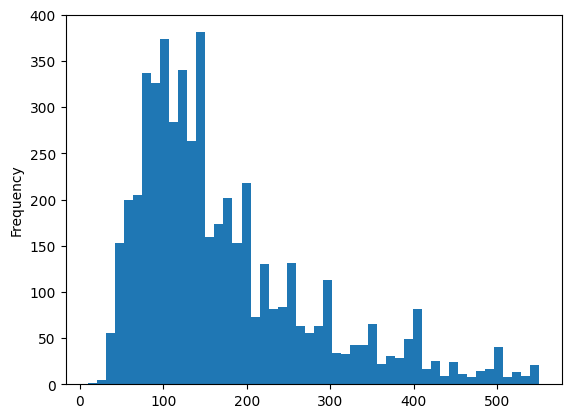

In [13]:
# Creating an histogram: It's hard to see anything with this distribution

df['price_usd'].plot.hist(bins = 50)

In [15]:
# Isolating the most extreme outliers to analyse them

df_top_outliers = df[df['price_usd'] > 400]

In [17]:
df_top_outliers.shape # there are only 256 above $400 a night

(254, 46)

In [18]:
df_top_outliers[['id','host_id','price_usd']].head(254)

,id,host_id,price_usd
70,142177,656263,425.0
71,144242,699215,495.0
93,867555,4562696,499.0
111,980397,5148234,500.0
120,1016604,58930,513.0
...,...,...,...
5145,8735636,45832439,550.0
5177,9261548,21418699,455.0
5189,9488665,30597445,499.0
5227,279184,1456262,550.0


In [19]:
# Finding the cutoff point of most outliers

df_outliers_range = df[(df['price_usd'] > 200) & (df['price_usd'] < 400)]

In [21]:
df_outliers_range.shape # 1174 listings are priced between $200-400 a night.

(1174, 46)

<Axes: ylabel='Frequency'>

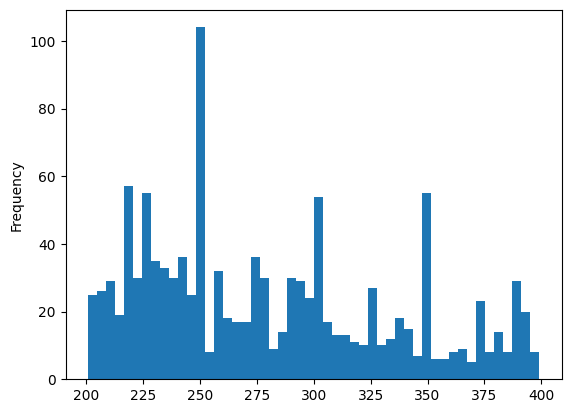

In [22]:
# Now I can see clearly: There are almost no listing priced above $900
# There are two spikes at $1000 and $1550, which I believe to be fake listings

df_outliers_range['price_usd'].plot.hist(bins = 50)

In [23]:
# Isolating any listing priced above $500 a night.

df_outliers = df[df['price_usd'] > 500]

In [25]:
df.shape

(5266, 46)

In [26]:
df_outliers.shape # There are 55, which is only 1% of listings (total listings = 5266).

(55, 46)

***Second, I am looking at the low outliers, the minimum price.***

In [27]:
df_bottom_outliers = df[df['price_usd'] < 50]

In [28]:
df_bottom_outliers.shape

(140, 46)

<Axes: ylabel='Frequency'>

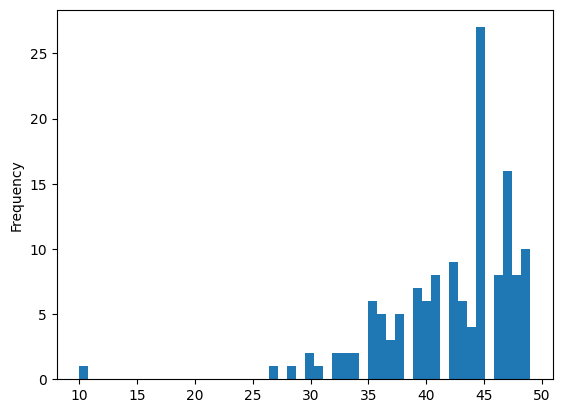

In [29]:
df_bottom_outliers['price_usd'].plot.hist(bins = 50)

In [30]:
df_b_outliers = df[df['price_usd'] < 10]

In [31]:
df_b_outliers.shape

(0, 46)

After some research, I decided it would only be appropriate to delete the cheapest 52 listings (<10 per night). I was surprised but there are many cheap listings in San Francisco (albeit not very luxurious..!). However, below $10 I started seeing mainly unexisting or mis-referenced listings.

***Dropping the outliers***

In [ ]:
# # Keeping only listings above $10/night and below $1000/night

# df_clean = df[(df['price_usd'] > 10) & (df['price_usd'] < 1000)]
# df_clean.shape

***Keeping only the columns I will use***

In [32]:
# data_to_plot = df_clean[['neighbourhood_cleansed','price_usd']]
data_to_plot = df[['neighbourhood_cleansed','price_usd']]

In [33]:
data_to_plot.head()

,neighbourhood_cleansed,price_usd
0,Pacific Heights,55.0
1,Western Addition,194.0
2,Bernal Heights,235.0
3,Haight Ashbury,56.0
4,Mission,129.0


In [34]:
# Renaming the neighbourhood column for good measures! 

data_to_plot.rename(columns = {'neighbourhood_cleansed' : 'borough'}, inplace = True)

<ipython-input-34-777e51e2f146>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot.rename(columns = {'neighbourhood_cleansed' : 'borough'}, inplace = True)


In [35]:
data_to_plot.head()

,borough,price_usd
0,Pacific Heights,55.0
1,Western Addition,194.0
2,Bernal Heights,235.0
3,Haight Ashbury,56.0
4,Mission,129.0


***5. Plotting a Choropleth***

In [36]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [37.77, -122.41], zoom_start = 10)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['borough', 'price_usd'],
    key_on = 'feature.properties.neighbourhood', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "price per night").add_to(map)
folium.LayerControl().add_to(map)

map

In [37]:
map.save('plot_data.html')

# ***FINAL COMMENTS: This map visually answers my question about the price per night per area. Now I know where to stay to make the most out of my money! Unsurprisingly the central borough are the most expensive ones.***

***Now I feel it would be interesting to take this further and explore this map in greater details, for example:***

1. By splitting the dataframe between "entire homes" & "private room" and compare the pricing that way.
2. By isolating "accommodates = 2" (the main amount) and comparing prices between areas
3. By looking at the average rating by area, particulalry since I have the metric 'review_scores_location'

In [38]:
from collections import Counter

In [39]:
# using Counter to analyze frequency of each listing based on neighborhood
nh = Counter(df['neighbourhood_cleansed'])

nh

Counter({'Pacific Heights': 103,
         'Western Addition': 338,
         'Bernal Heights': 254,
         'Haight Ashbury': 230,
         'Mission': 483,
         'Bayview': 139,
         'Nob Hill': 228,
         'Castro/Upper Market': 230,
         'Potrero Hill': 118,
         'Glen Park': 46,
         'Outer Richmond': 152,
         'Downtown/Civic Center': 624,
         'Financial District': 89,
         'Marina': 144,
         'Inner Richmond': 148,
         'Outer Sunset': 264,
         'West of Twin Peaks': 87,
         'North Beach': 92,
         'Excelsior': 144,
         'Outer Mission': 103,
         'Inner Sunset': 115,
         'Chinatown': 90,
         'Russian Hill': 99,
         'Presidio Heights': 24,
         'South of Market': 324,
         'Noe Valley': 189,
         'Parkside': 124,
         'Crocker Amazon': 37,
         'Ocean View': 81,
         'Golden Gate Park': 3,
         'Presidio': 7,
         'Seacliff': 6,
         'Twin Peaks': 39,
         'Lakesho

###  Let's visualize the frequency of listings separated by neighborhood using a bar graph

<Axes: title={'center': 'SF Neighborhood Frequency'}>

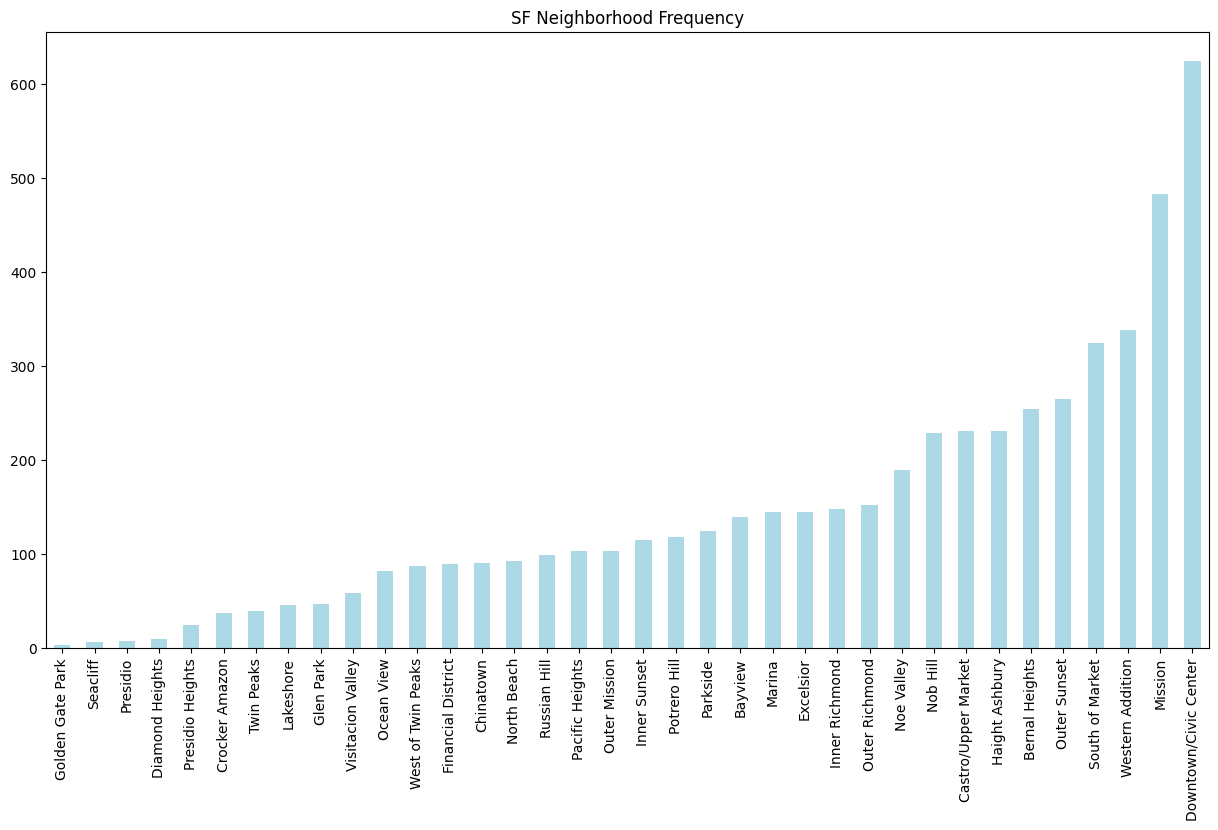

In [40]:
nh_df = pd.DataFrame.from_dict(nh, orient='index').sort_values(by=0)
nh_df.plot(kind='bar', 
           color = 'LightBlue', 
           figsize =(15,8), 
           title = 'SF Neighborhood Frequency', 
           legend = False)

It looks like Mission has the most listings, followed by Western Addition, South of Market, and Downtown/Civic Center. We will now analyze the average listing on SF, then further break it down for each neighborhood to understand the pricing breakdown.

### Let's see the average price of every listing available on SF

In [42]:
average_price = sum(df.price_usd) / float(len(df.price_usd))
average_price

173.46714774022027

### Let's see what the average prices are for each neighborhood

In [43]:
nh_df.rename(columns={0: 'number_of_listings'}, inplace=True)

In [44]:
nh_df.index.name = 'neighbourhood'

In [45]:
nh.items()

dict_items([('Pacific Heights', 103), ('Western Addition', 338), ('Bernal Heights', 254), ('Haight Ashbury', 230), ('Mission', 483), ('Bayview', 139), ('Nob Hill', 228), ('Castro/Upper Market', 230), ('Potrero Hill', 118), ('Glen Park', 46), ('Outer Richmond', 152), ('Downtown/Civic Center', 624), ('Financial District', 89), ('Marina', 144), ('Inner Richmond', 148), ('Outer Sunset', 264), ('West of Twin Peaks', 87), ('North Beach', 92), ('Excelsior', 144), ('Outer Mission', 103), ('Inner Sunset', 115), ('Chinatown', 90), ('Russian Hill', 99), ('Presidio Heights', 24), ('South of Market', 324), ('Noe Valley', 189), ('Parkside', 124), ('Crocker Amazon', 37), ('Ocean View', 81), ('Golden Gate Park', 3), ('Presidio', 7), ('Seacliff', 6), ('Twin Peaks', 39), ('Lakeshore', 45), ('Visitacion Valley', 58), ('Diamond Heights', 9)])

In [47]:
# # extracting the names
neighborhood_names = list(nh.keys())

# # 2 column table of neighborhood names and prices
nh_prices = df[['neighbourhood_cleansed', 'price_usd']]
nh_prices.columns = ['neighbourhood', 'price_usd']

# # we pick out the rows which have neighborhood names with 400+ listings.
nh_prices = nh_prices[nh_prices['neighbourhood'].isin(neighborhood_names)]

# # group by neighbourhood and then aggreate the prices based on mean
nh_prices_group = nh_prices.groupby('neighbourhood')

# area1_df['avg_price'] = listing.groupby('neighbourhood_cleansed').price.mean().values
nh_prices = nh_prices_group['price_usd'].agg(np.mean)
# nh_prices['avg_price'] = nh_prices_group.price.mean().values

# # turn dictionary's keys and values into a table for easy read
nh_prices = nh_prices.reset_index()

nh_prices['number of listings'] = nh_prices['neighbourhood'].map(nh)

In [48]:
# nh_prices.drop('price', axis=1, inplace=True)
nh_prices['avg_price'] = nh_prices_group['price_usd'].mean().values
nh_prices = nh_prices.sort_values(by=['avg_price'], ascending=False)
nh_prices = nh_prices.sort_values(by=['number of listings'], ascending=False)
nh_prices.drop('price_usd', axis=1, inplace=True)

In [49]:
nh_prices

,neighbourhood,number of listings,avg_price
6,Downtown/Civic Center,624,165.233974
16,Mission,483,172.621118
35,Western Addition,338,180.127219
31,South of Market,324,170.537037
23,Outer Sunset,264,137.401515
1,Bernal Heights,254,187.082677
11,Haight Ashbury,230,187.573913
2,Castro/Upper Market,230,222.930435
17,Nob Hill,228,153.837719
18,Noe Valley,189,201.370370


<Axes: title={'center': 'SF Neighborhood Frequency'}, xlabel='neighbourhood'>

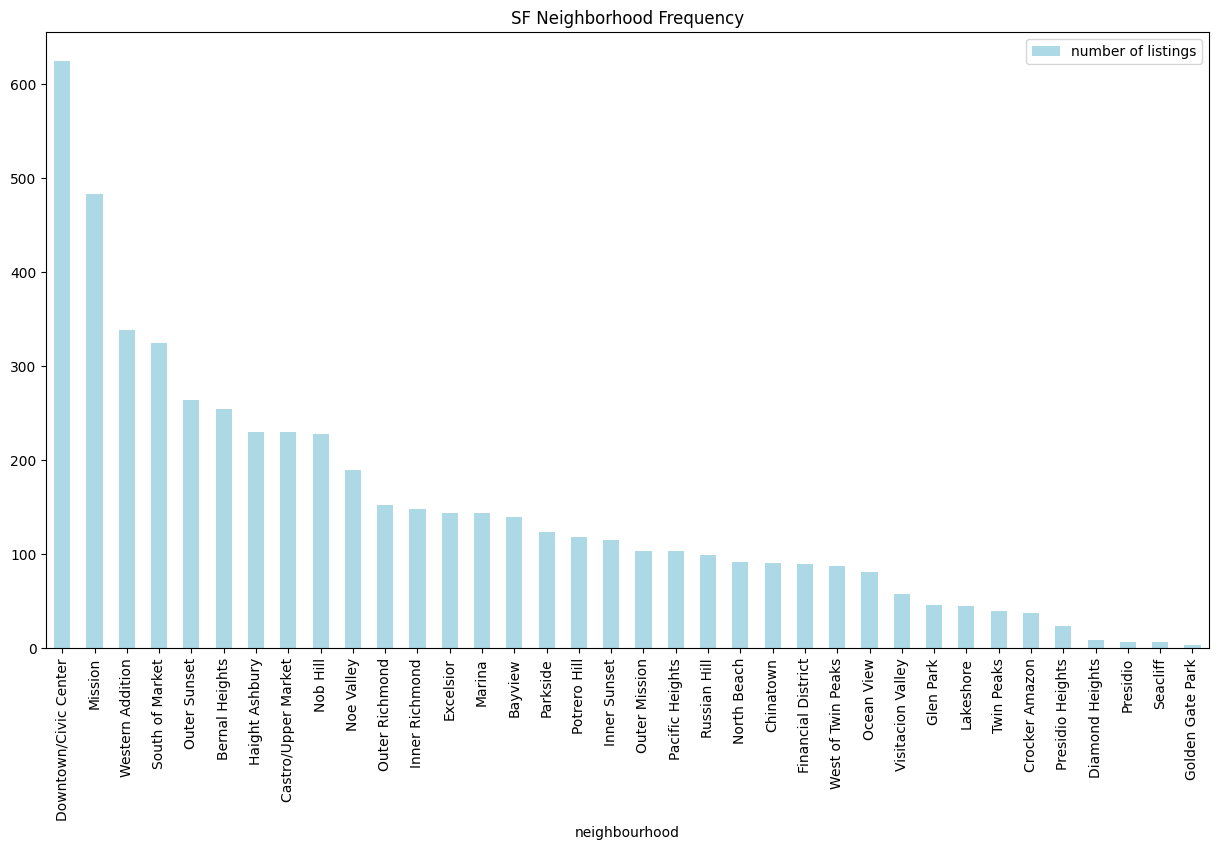

In [50]:
nh_prices.plot(
           x='neighbourhood',
           y='number of listings',
           kind='bar', 
           color = 'LightBlue', 
           figsize =(15,8), 
           title = 'SF Neighborhood Frequency', 
           legend = True)

### Let's graph each neighborhood based on prices

<Axes: title={'center': 'Average Price per Neighorhood'}, xlabel='neighbourhood'>

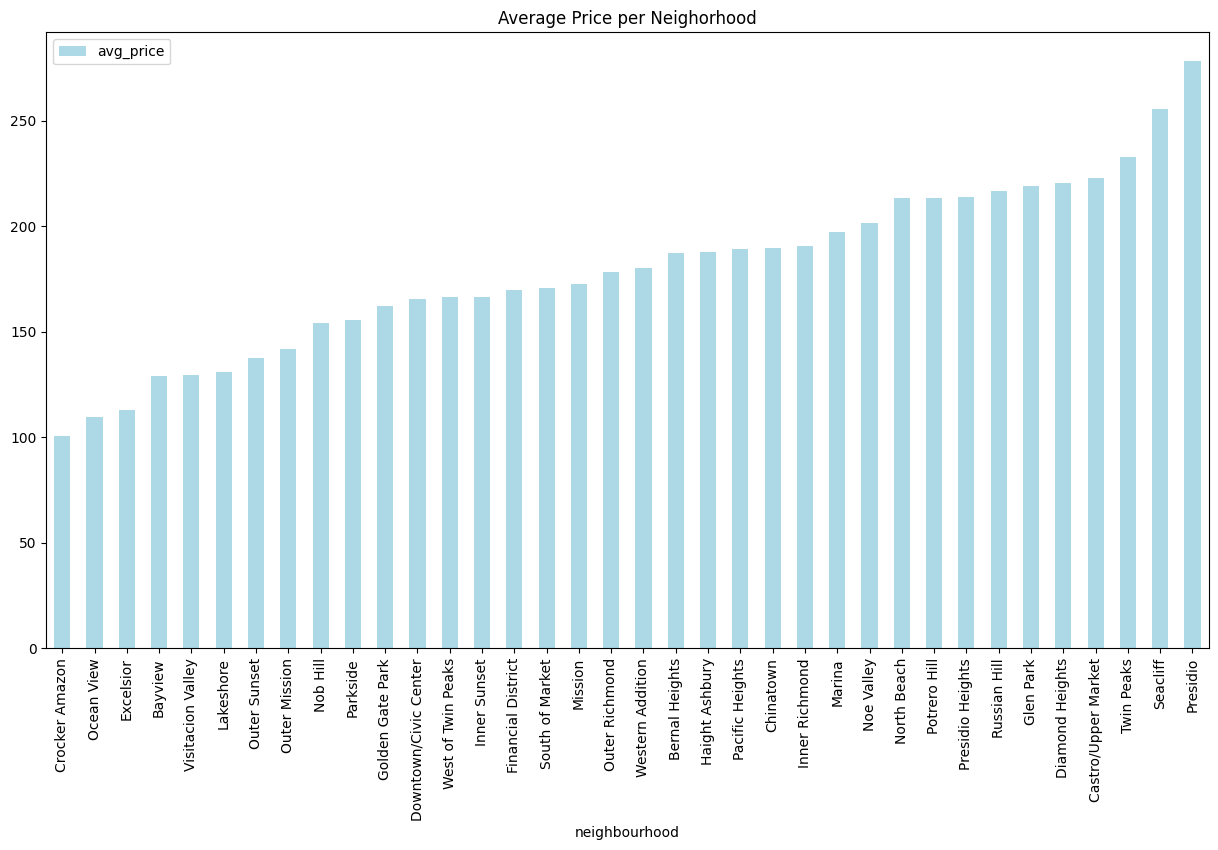

In [51]:
p = nh_prices.sort_values(by = 'avg_price')
p.plot(x = "neighbourhood",
       y = "avg_price",
       kind='bar', 
       color = 'LightBlue', 
       figsize =(15,8), 
       title = 'Average Price per Neighorhood', 
       legend = True)